#EDA

##Обработка ga_sessions

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from matplotlib.ticker import FormatStrFormatter
from scipy import stats

In [29]:
df1 = pd.read_csv('/content/ga_sessions.csv')
df1.head(10)

<ipython-input-29-e198e61a047a>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/ga_sessions.csv')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
5,9055447192389856083.1622453074.1622453074,2108385598.162245,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
6,9055455318486370642.1640843788.1640843788,2108387490.164084,2021-12-30,08:56:28,1,TxKUcPpthBDPieTGmVhx,cpc,FTjNLDyTrXaWYgZymFkV,LcGIUNPUAmXtQJaDfFBR,PwscUHjoUJDrtfWESIHj,tablet,Android,Lenovo,NaN,602x1029,YaBrowser,Russia,Saint Petersburg
7,9055461992850812764.1626107740.1626107740,2108389044.162611,2021-07-12,19:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,360x640,Chrome,Russia,Saint Petersburg
8,9055462349345527315.1638536723.1638536723,2108389127.163854,2021-12-03,16:05:23,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Moscow
9,9055466554104774132.1624800757.1624800757,2108390106.16248,2021-06-27,16:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Samsung,NaN,412x915,Chrome,Russia,Moscow


<Axes: >

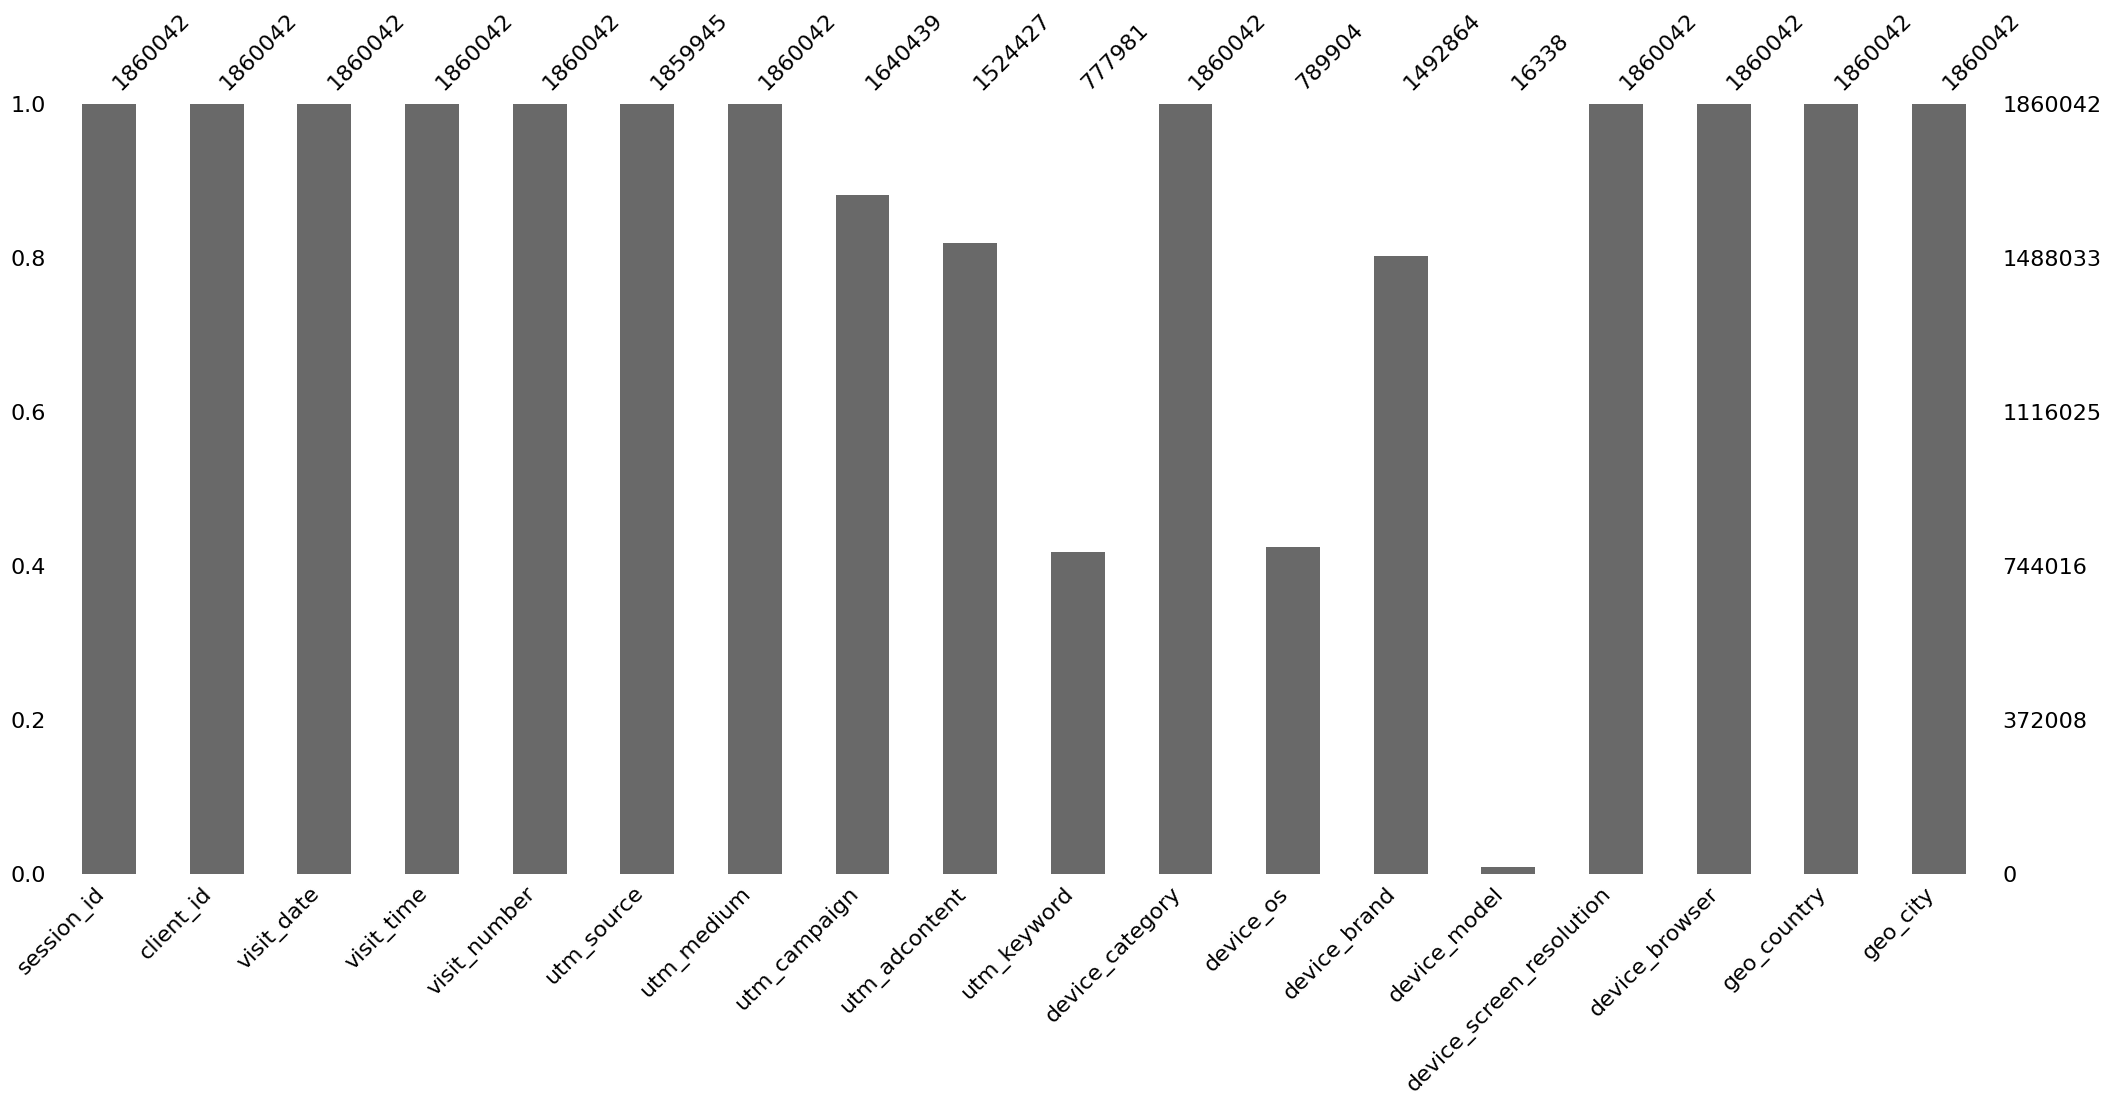

In [30]:
msno.bar(df1)

<Axes: >

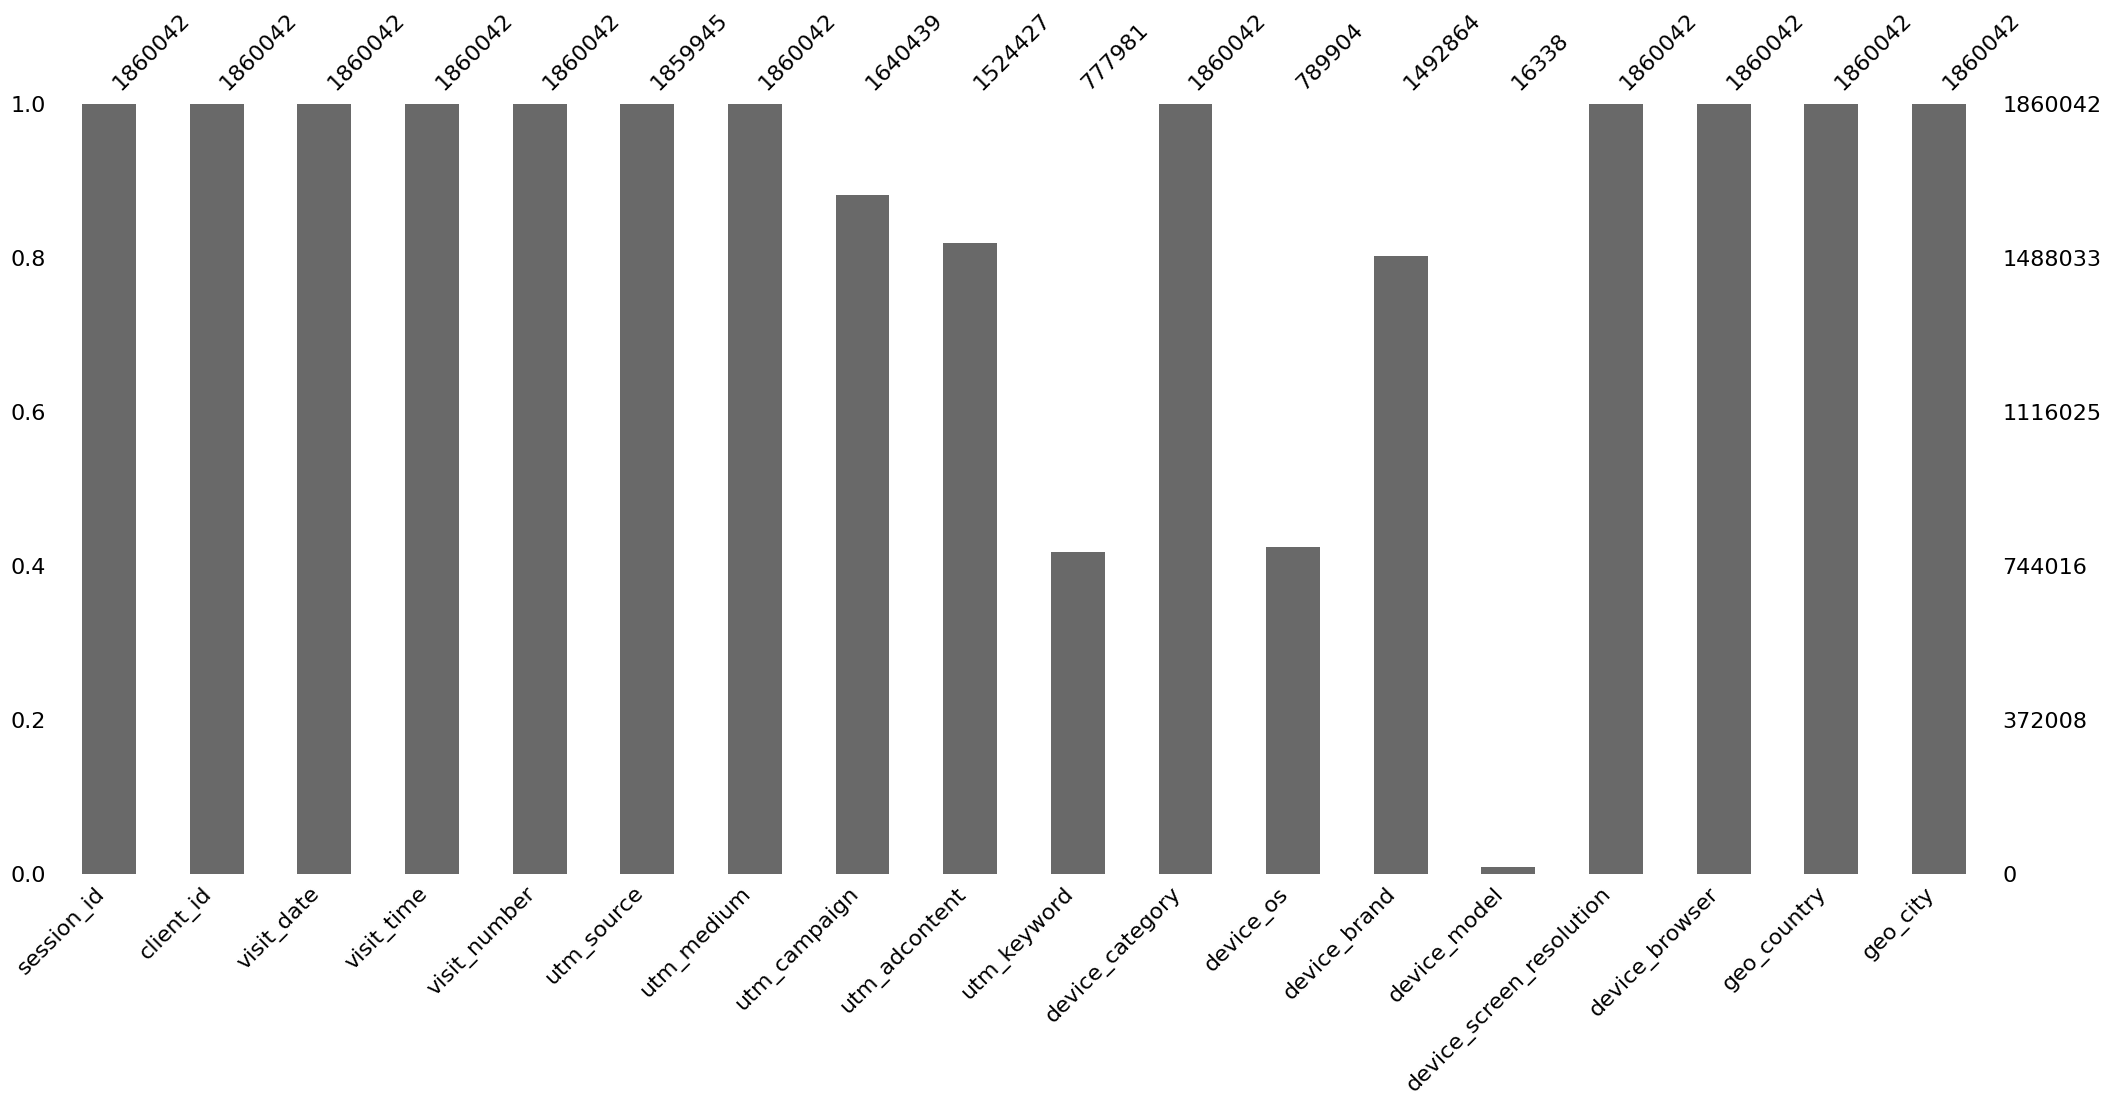

In [31]:
msno.bar(df1)

In [32]:
for i in df1.columns:
    print('Характеристика: '+ i)
    print('Количество уникальных значений: ',df1[i].nunique())
    print('Список значений:')
    print(df1[i].value_counts())

Характеристика: session_id
Количество уникальных значений:  1860042
Список значений:
session_id
9055434745589932991.1637753792.1637753792    1
6294640354816492625.1638728787.1638728809    1
6294832296889291185.1623245519.1623245519    1
6294832296889291185.1623161065.1623161065    1
6294832296889291185.1623156608.1623156608    1
                                            ..
3525580570051063315.1625927189.1625927189    1
3525573324456022940.1640876964.1640876964    1
3525573324456022940.1640837067.1640837067    1
3525573324456022940.1640715164.1640715164    1
9055430416266113553.1640968742.1640968742    1
Name: count, Length: 1860042, dtype: int64
Характеристика: client_id
Количество уникальных значений:  1391717
Список значений:
client_id
1.750498e+09    462
1.309184e+08    334
1.266575e+09    309
7.368596e+08    306
1.894772e+09    276
               ... 
8.789419e+08      1
8.789399e+08      1
8.789397e+08      1
8.789339e+08      1
2.108382e+09      1
Name: count, Length: 1391717, 

In [33]:
# удаляю пустые/ненужные колонки:
# device_model - пустая
# utm_keyword - пустая на 50% и не несут в себе данных, существенно нужных для исследования
# device_screen_resolution для исследования не пригодится

df1_cp = df1.drop(columns=['device_model', 'utm_keyword', 'device_screen_resolution'])

In [34]:
def print_useful_rows_info(df):
   print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
   print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))

print_useful_rows_info(df1_cp)

Количество полностью заполненных объектов из всей выборки:  578853
Процент полностью заполненных объектов из всей выборки:  31.12


In [35]:
#нахожу колонки в которых пропущены значения и их количество
columns = df1_cp.columns.to_list()
def number_of_passes(df, columns):
  list_of_passes = []
  for column in columns:
    count = df[column].isna().sum()
    if count > 0:
      list_of_passes.append([column, count])
  return list_of_passes
number_of_passes(df1_cp, columns)

[['utm_source', 97],
 ['utm_campaign', 219603],
 ['utm_adcontent', 335615],
 ['device_os', 1070138],
 ['device_brand', 367178]]

In [36]:
# utm_source заполняем самым популярным источником

mode_utm_source = df1_cp['utm_source'].mode()[0]
df1_cp['utm_source'] = df1_cp['utm_source'].fillna(mode_utm_source)
number_of_passes(df1_cp, ['utm_source'])

[]

In [50]:
# utm_campaign заполняем unknown,
# так как пропущенных слишком много и нет сильно преобладающей моды

df1_cp['utm_campaign'] = df1_cp['utm_campaign'].fillna('unknown')


In [38]:
# utm_adcontent заполняем модой,
# есть самое популярное значение и оно сильно преобладает

mode_utm_adcontent = df1_cp['utm_adcontent'].mode()[0]
df1_cp['utm_adcontent'] = df1_cp['utm_adcontent'].fillna(mode_utm_adcontent)
number_of_passes(df1_cp, ['utm_adcontent'])

[]

In [39]:
# пытаемся восстановить значения device_os по значениям колонки device_brand и device_browser
# нахожу значения на которые можно ориентироваться в этих колонках

df1_cp['device_brand'].value_counts()[0:30]

,count
device_brand,
Apple,551088
Samsung,332194
Xiaomi,288367
Huawei,185853
Realme,19058
(not set),17545
OPPO,13504
Vivo,11740
OnePlus,9965


In [40]:
df1_cp['device_browser'].value_counts()[0:30]

,count
device_browser,
Chrome,1013436
Safari,478562
YaBrowser,133311
Safari (in-app),69912
Android Webview,55369
Samsung Internet,47309
Opera,26817
Firefox,16588
Edge,16065


In [41]:
# составляю списки значений, которые относятся к самым популярным os

dbrowser_android = ['Android Webview', 'Samsung Internet', 'Android Runtime',
                    'Instagram 208.0.0.32.135 Android', 'Instagram 209.0.0.21.119 Android',
                     'Android Browser', 'Android','Instagram 216.1.0.21.137 Android',
                    'Instagram 194.0.0.36.172 Android', 'Instagram 202.0.0.37.123 Android'
                   ]

dbrand_android = ['Xiaomi', 'Samsung','Huawei', 'Realme', 'Lenovo', 'Philips', 'ZTE', 'OPPO', 'Vivo', 'OnePlus',
                 'Nokia', 'Sony', 'Tecno', 'Motorola', 'BQ', 'itel']

dbrowser_iOS = ['Safari (in-app)', 'Safari']

# добавляю значения os для компьютеров
d_os_desktop = ['Windows', 'Macintosh']

In [42]:
# приступаю непосредственно к заполнению с помощью lambda функции

df1_cp['device_os'] = df1_cp.apply(lambda x:
    'iOS' if pd.isna(x['device_os']) and (x['device_brand'] == 'Apple'
                                              or x['device_browser'] in dbrowser_iOS)
                                          and x['device_category'] in ['mobile', 'tablet']
          else 'Android' if pd.isna(x['device_os'])
                                          and (x['device_brand'] in dbrand_android
                                               or x['device_browser'] in dbrowser_android)
                                          and x['device_category'] in ['mobile', 'tablet']
          else 'Macintosh' if pd.isna(x['device_os'])
                                          and x['device_brand'] == 'Apple'
                                          and x['device_category'] == 'desktop'
          else 'Windows' if pd.isna(x['device_os'])
                                          and x['device_category'] == 'desktop'
          else x['device_os'], axis=1)

In [43]:
number_of_passes(df1_cp, ['device_os'])

[['device_os', 23812]]

In [44]:
df1_cp.loc[0:30, ['device_category', 'device_os', 'device_brand', 'device_browser']]

,device_category,device_os,device_brand,device_browser
0,mobile,Android,Huawei,Chrome
1,mobile,Android,Samsung,Samsung Internet
2,mobile,Android,Huawei,Chrome
3,mobile,Android,Xiaomi,Chrome
4,mobile,Android,Xiaomi,Chrome
5,mobile,iOS,Apple,Safari
6,tablet,Android,Lenovo,YaBrowser
7,mobile,Android,Samsung,Chrome
8,mobile,iOS,Apple,Safari
9,mobile,Android,Samsung,Chrome


In [45]:
# остальные NaN заполним unknown
df1_cp['device_os'] = df1_cp['device_os'].fillna('unknown')

In [46]:
df1_cp[df1_cp['device_brand'].isna()][60:90]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_browser,geo_country,geo_city
340,9056930158714089390.1638727110.1638727110,2108730878.163872,2021-12-05,20:58:30,3,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,Kostroma
341,9056930158714089390.1638729889.1638729889,2108730878.163872,2021-12-05,21:44:49,4,aXQzDWsJuGXeBXexNHjc,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,Kostroma
343,905693499230150465.1627291539.1627291607,210873200.162728,2021-07-26,12:00:00,2,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Opera,Russia,Sochi
344,905693499230150465.1627293175.1627295035,210873200.162728,2021-07-26,13:00:00,3,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Opera,Russia,Sochi
346,905694804909890936.1636965752.1636965752,210873504.163697,2021-11-15,11:42:32,1,vFcAhRxLfOWKhvxjELkx,organic,okTXSMadDkjvntEHzIjp,LLfCasrxQzJIyuldcuWy,desktop,Windows,NaN,Chrome,Russia,Moscow
366,9057101287378521238.1626213565.1626213565,2108770722.162621,2021-07-14,00:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,IZEXUFLARCUMynmHNBGo,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,(not set)
367,9057101287378521238.1626213621.1626213621,2108770722.162621,2021-07-14,01:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,IZEXUFLARCUMynmHNBGo,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,(not set)
373,9057125137332696913.1626994516.1626994548,2108776275.1627,2021-07-23,01:00:00,1,bByPQxmDaMXgpHeypKSM,referral,IKQsApKuPmZqqmhieEgf,XVKNbZXFFeCXocbAHwpS,desktop,Windows,NaN,YaBrowser,Russia,(not set)
382,9057158844235701111.1626659699.1626659699,2108784123.162666,2021-07-19,04:00:00,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,(not set)
383,905717048530421736.1621870568.1621870568,210878683.162187,2021-05-24,18:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,Windows,NaN,Chrome,Russia,Moscow


In [47]:
# заполняем device_brand по такому же принципу
# заполним наиболее точными брендами, где это возможно, остальное заполиним not set (desktop)
# так как в основном пропущенны именно бренды пользователей компьютеров

df1_cp['device_brand'] = df1_cp.apply(lambda x:
                                           'Apple' if pd.isna(x['device_brand'])
                                           and ((x['device_os'] in['iOS', 'Macintosh'])
                                           or x['device_browser'] in dbrowser_iOS)
                                           else 'Samsung' if pd.isna(x['device_brand'])
                                           and x['device_browser'] == 'Samsung Internet'
                                           else '(not set(desktop))' if pd.isna(x['device_brand'])
                                           and x['device_category'] == 'desktop'
                                           else x['device_brand'], axis=1)

number_of_passes(df1_cp, ['device_brand'])

[['device_brand', 280]]

In [48]:
df1_cp[df1_cp['device_brand'].isna()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_browser,geo_country,geo_city
24009,9161436681631382037.1625242134.1625242134,2133063199.162524,2021-07-02,19:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,JwYIveaHVpeeRZloQCfF,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Moscow
26043,9170117347413292512.1631024608.1631024608,2135084324.163102,2021-09-07,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Opera,Russia,Moscow
26714,9172914908724584214.1634328343.1634328343,2135735682.163433,2021-10-15,23:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,hJvOVTMdhkqIBqjVrsOL,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Saint Petersburg
43029,944703987097397663.1624631711.1624631711,219956037.162463,2021-06-25,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Moscow
60248,1021042336384541670.1624630248.1624630248,237729944.162463,2021-06-25,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Fryazino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826601,8906284988244266175.1622248640.1622248640,2073656066.162225,2021-05-29,03:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,KUROllwAYyecYcjFOgAi,aYAcKhelKzYpXrRYknSP,mobile,unknown,NaN,Chrome,Russia,Moscow
1829913,8920735105066328899.1624630082.1624630082,2077020496.162463,2021-06-25,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,DnEUulZAecfGPvdtZBYS,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Moscow
1853240,9024892064901457390.1622238706.1622238706,2101271428.162224,2021-05-29,00:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,XKsYZiUFcdkUXQpoLKyS,mobile,unknown,NaN,Chrome,Russia,Saint Petersburg
1854416,9030278666862206423.1629925388.1629925388,2102525594.162923,2021-08-26,00:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,JNHcPlZPxEMWDnRiyoBf,mobile,unknown,NaN,Chrome,Russia,Saint Petersburg


In [51]:
# принимаю решение удалить остальные строки, так как в них
# не получилось заполнить большинство пропусков в 3 колонках
# и проверяю полностью весь датасет
df1_cp = df1_cp.dropna(subset=['device_brand'])
number_of_passes(df1_cp, columns)

[]

<Axes: >

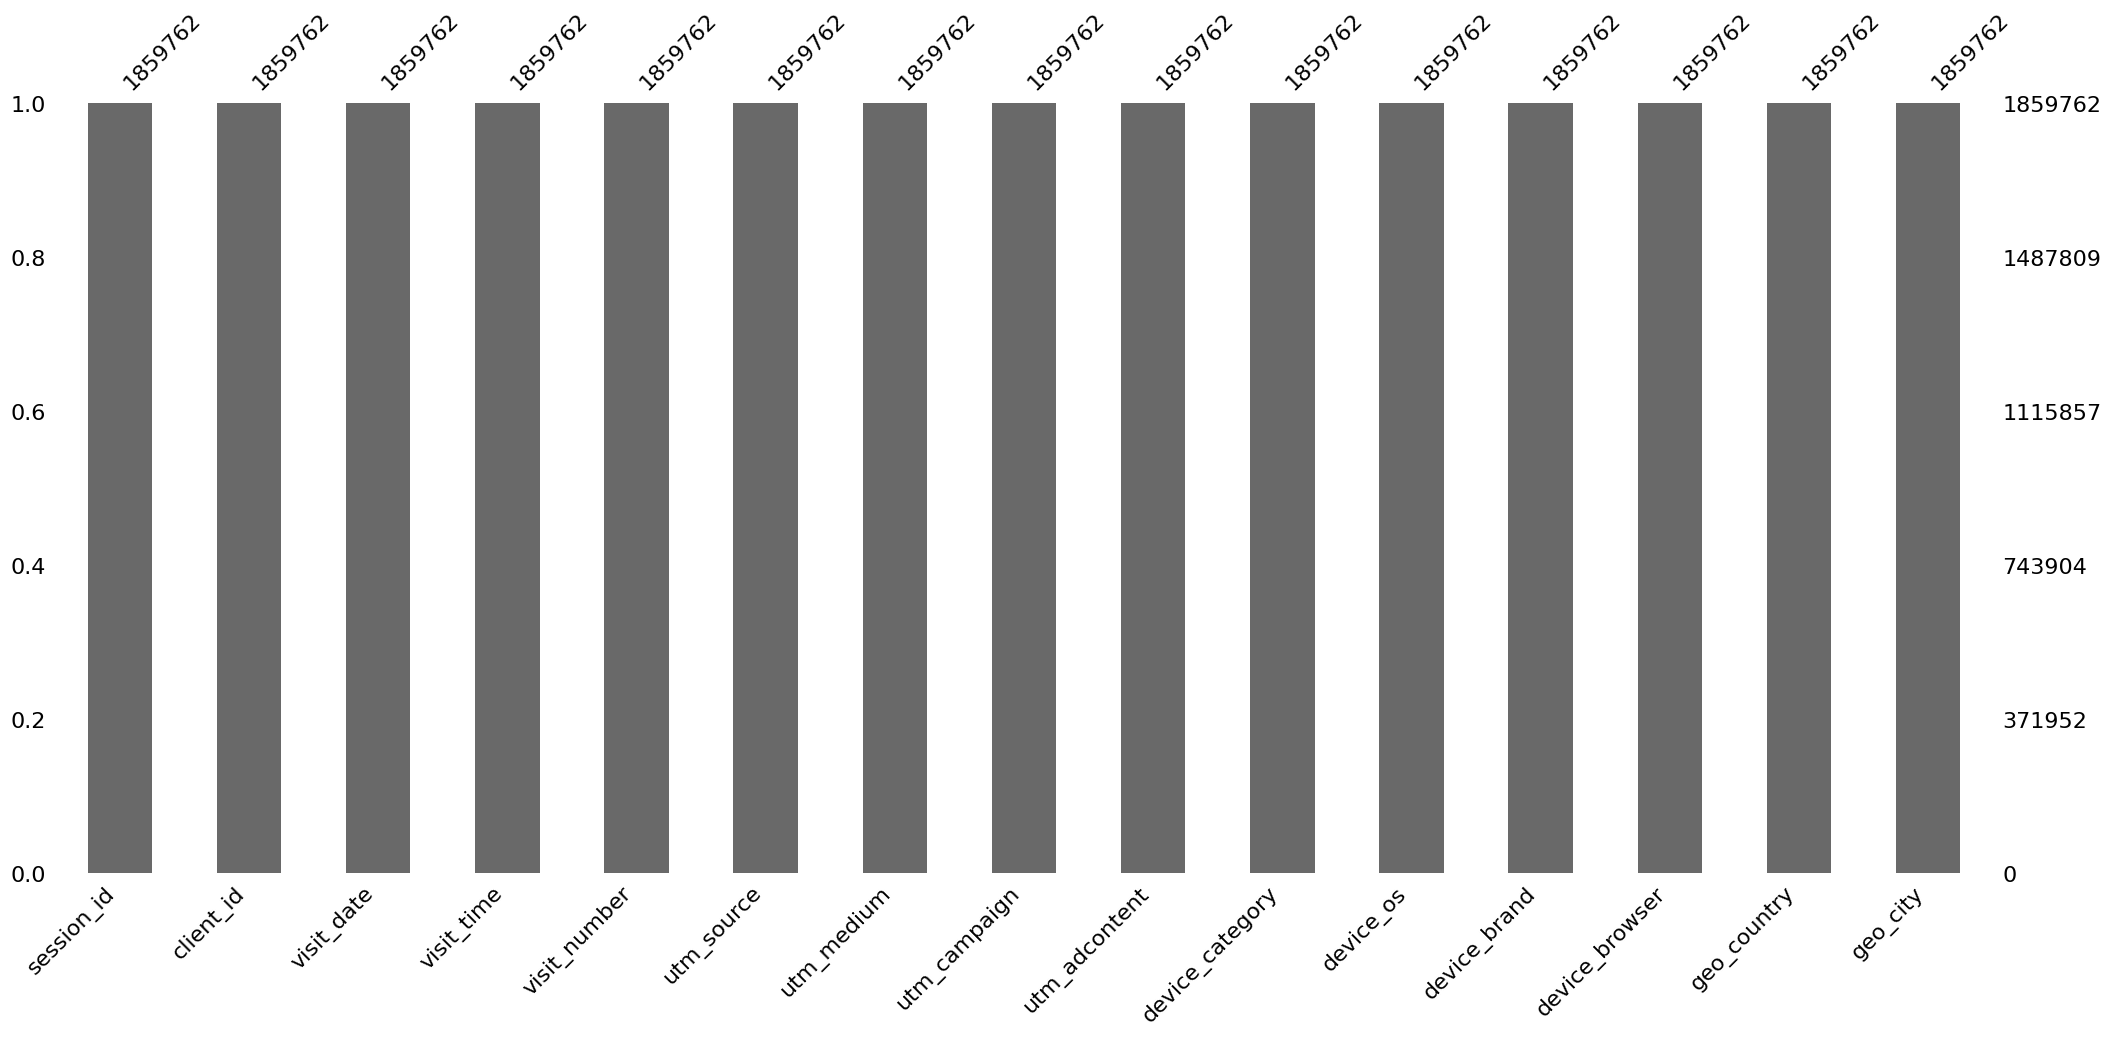

In [52]:
msno.bar(df1_cp)

Создание новых фич

Cоздаю категориальные фичи:
    - 'type of traffic' - 0, если трафик платный / 1, если трафик органический
    - 'traffic_from' - 1, если трафик из Москвы, МО, Санкт Петербурга / 0, если из остальных регионов
    - 'type_device' - 1, если мобильное устройство / 0, если компьютер
    - 'source social media' - 1, если да, 0, если нет


In [54]:
# из методичесиких указаний берем информацию для создания фичи с помощью лямбда функции

df1_cp['type of traffic'] = df1_cp.utm_medium.apply(lambda x:
                                        1 if x in ['organic','referral', '(none)']
                                         else 0)

# для фичи с городами нахожу в интернете таблицу городов подмосковья, выгружаю в excel, а затем сюда
df_cities = pd.read_csv('города подмосковья.csv')
cities_present_rus = df_cities.Название.unique().tolist()

# далее с помощью переводчика в браузере перевожу названия на английский и добавляю Москву и Питер
cities_present = ['Moscow', 'Saint Petersburg','Balashikha','Podolsk', 'Khimki', 'Mytishchi', 'Korolev', 'Lyubertsy', 'Krasnogorsk', 'Elektrostal',
                  'Kolomna', 'Odintsovo', 'Domodedovo', 'Shchyolkovo', 'Serpukhov','Ramenskoye', 'Orekhovo-Zuyevo', 'Dolgoprudny',
                  'Pushkino','Reutov','Zhukovsky', 'Noginsk', 'Sergiyev Posad', 'Voskresensk','Lobnya','Ivanteevka',
                  'Prominent','Dubna', 'Yegoryevsk','Chekhov','Dmitrov', 'Naro-Fominsk', 'Stupino',
                  'Pavlovsky Posad', 'Lytkarino','Fryazino','Dzerzhinsky', 'Kotelniki', 'Solnechnogorsk', 'Kashira',
                  'Krasnoznamensk','Protvino','Istra','Aprelevka','Shatura', 'Dedovsk','Lukhovitsy','Mozhaysk',
                  'Likino-Dulevo','Krasnoarmeysk','Losino-Petrovsky', 'Lakes','Zvenigorod','Staraya Kupavna',
                  'Zaraysk', 'Elektrogorsk','Bronnitsy', 'Khotkovo' ,'Chernogolovka', 'Electric coal', 'Pushkino',
                  'Kurovskoye','Kubinka', 'Roshal', 'Volokolamsk', 'Beloozersky', 'Golitsyno','Yakhroma', 'Peresvet',
                  'Krasnozavodsk','Taldom', 'Ruza', 'Dreznaya','Vysokovsk']

df1_cp['traffic_from'] = df1_cp.geo_city.apply(lambda x:
                                     1 if x in cities_present
                                          else 0)

df1_cp['type_device'] = df1_cp.device_category.apply(lambda x:
                                                    0 if x == 'desktop'
                                                    else 1)

df1_cp['source social media'] = df1_cp.utm_source.apply(lambda x:
                                                    0 if x in ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                                                               'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                                                               'PlbkrSYoHuZBWfYjYnfw','gVRrcxiDQubJiljoTbGm']
                                                    else 1)


In [55]:
df1_cp.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_browser,geo_country,geo_city,type of traffic,traffic_from,type_device,source social media
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,Chrome,Russia,Zlatoust,0,0,1,1
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,0,1,1,0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,0,0,1,1
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,Android,Xiaomi,Chrome,Russia,Moscow,0,1,1,1
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,Chrome,Russia,Moscow,0,1,1,1


## Обработка ga_hits

In [ ]:
df2 = pd.read_csv('ga_hits.csv')
df2.head()

In [57]:
# в первую очередь обрабатываю тяжелую колонку hit_page_path
df2.loc[0:60, 'hit_page_path']

In [ ]:
#вычленяю из ссылки только название марки и модели авто, а если его нет - ставлю "неизвестно"
df2['car_brand'] = df2.hit_page_path.apply(lambda x:
                                           x.lower().split('/')[3:5]
                                           if 'sberauto.com/cars/all/' in x else 'unknown' )

df2['car_brand'] = df2.car_brand.apply(lambda x:
                                       ' '.join(x) if type(x) == list else x)

df2.iloc[50:100, :]

In [ ]:
# удаляю эту колонку
df2 = df2.drop(columns = ['hit_page_path'])

In [ ]:
# смотрю на значения датасета
for i in df2.columns:
    print('Характеристика: '+ i)
    print('Количество уникальных значений: ',df2[i].nunique())
    print('Список значений:')
    print(df2[i].value_counts())

In [ ]:
msno.bar(df2)

In [ ]:
# заполняю целевую переменную

event_target = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

df2['event_value'] = df2.event_action.apply(lambda x:
                                    1 if x in event_target
                                    else 0)


In [ ]:
# создаю датафрейм только с нужными фичами для исследования: session_id, car_brand и event_value
df2_new = df2.loc[:, ['session_id', 'car_brand', 'event_value']]
df2_new.head()


До объединения ответим на вопрос продуктовой команды по поводу авто, так как не получится корректно сгруппировать датафрейм:
> Какие авто пользуются наибольшим спросом? У каких авто самый
лучший показатель CR (Conversion Rate) в целевые события?


In [ ]:
# смотрю на
model_counts = df2_new['car_brand'].value_counts()[1:11] # нулевое значение unknown не учитываю
model_counts

In [ ]:
# сделаем для наглядности гистограмму
plt.figure(figsize=(10, 6))
model_counts.plot(kind='bar', color='skyblue')
plt.title('Популярность моделей авто')
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество автомобилей')
plt.xticks(rotation=45)
plt.tight_layout()  # Подгонка графика под размеры окна
plt.show()

In [ ]:
# нахожу авто, у которых самый лучший показатель CR
df_target_actions = df2_new.groupby('car_brand', as_index=False)['event_value'].sum()
df_target_actions = df_target_actions.rename(columns={'event_value': 'total_target_actions'})
df_top_car = df_target_actions.sort_values('total_target_actions', ascending=False)[1:11]
df_top_car

In [ ]:
# cоздаём график топ 10 авто с лучшим CR
plt.figure(figsize=(12, 6))
plt.bar(df_top_car['car_brand'], df_top_car['total_target_actions'], color='royalblue')

# Подписываем оси
plt.xlabel('Модель автомобиля')
plt.ylabel('Количество целевых действий')
plt.title('Количество целевых действий по маркам автомобилей')

# Поворачиваем подписи оси X для читаемости
plt.xticks(rotation=45, ha='right')

# Показываем график
plt.show()

In [ ]:
#  группирую датафрейм по session_id и удаляю модели авто, так как они больше не нужны
df2_group = df2_new.drop(columns='car_brand')
df2_group = df2_group.groupby('session_id', as_index=False)['event_value'].max()
df2_group

In [ ]:
df = pd.merge(df1_cp, df2_group, on='session_id', how='inner')
df.head()

In [ ]:
df.shape


In [ ]:
# сохраняем полный датафрейм в файл csv для дальнейших исследований
df.to_csv('df_full.csv')


#ГИПОТЕЗЫ И ТЕСТЫ

##Вопросы продуктовой команды

In [87]:
df = pd.read_csv('/content/df_full.csv')

In [88]:
df.head()


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_os,device_brand,device_browser,geo_country,geo_city,type of traffic,traffic_from,type_device,source social media,event_value
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,Chrome,Russia,Zlatoust,0,0,1,1,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Android,Samsung,Samsung Internet,Russia,Moscow,0,1,1,0,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Android,Huawei,Chrome,Russia,Krasnoyarsk,0,0,1,1,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,unknown,NOBKLgtuvqYWkXQHeYWM,mobile,Android,Xiaomi,Chrome,Russia,Moscow,0,1,1,1,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,unknown,JNHcPlZPxEMWDnRiyoBf,mobile,Android,Xiaomi,Chrome,Russia,Moscow,0,1,1,1,0


In [89]:
df = df.set_index('session_id')

In [90]:
event_value_counts = df['event_value'].value_counts()
#неравномерное распределение целевой переменной (Распределение Бернулли)
event_value_counts

,count
event_value,
0,1681687
1,50310


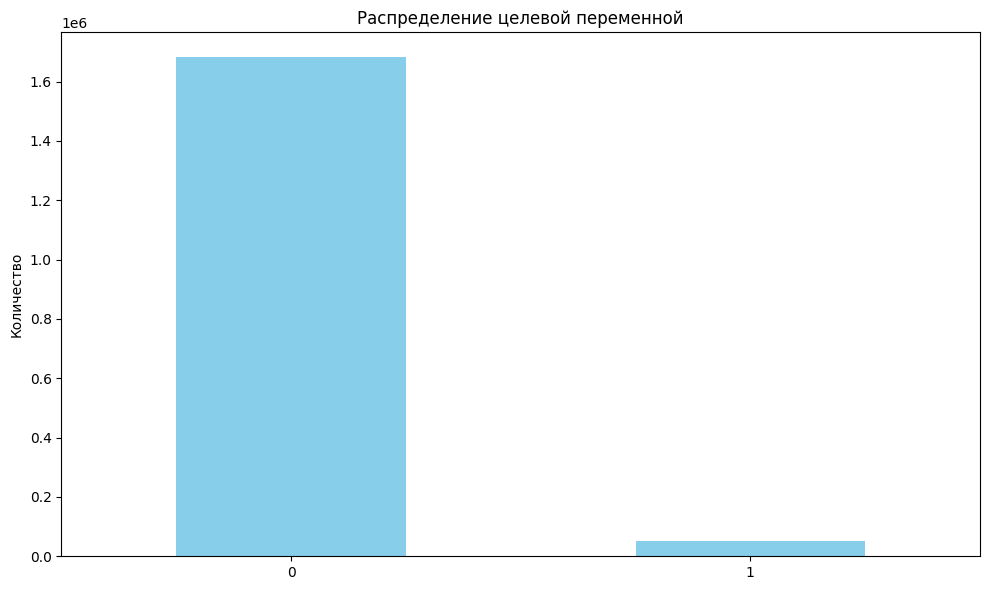

In [91]:
# Отражаю распределение на графике
plt.figure(figsize=(10, 6))
event_value_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение целевой переменной')
plt.xlabel('')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.tight_layout()  # Подгонка графика под размеры окна
plt.show()

Продолжаем отвечать на вопросы продуктовой команды.
Из каких источников / кампаний / устройств / локаций к нам идёт
самый целевой трафик (и с точки зрения объёма трафика, и с точки
зрения CR)

In [92]:
# utm_source с самым большим трафиком и с самым целевым трафиком

top_traffic = total_traffic = df.groupby('utm_source')['client_id'].count().sort_values(ascending=False)
target_traffic = df[df['event_value'] == 1].groupby('utm_source')['event_value'].count().sort_values(ascending=False)
top_traffic = top_traffic.head(10)
top_target_traffic = target_traffic.head(10)
print(top_traffic)
print(top_target_traffic)

utm_source
ZpYIoDJMcFzVoPFsHGJL    552631
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    244910
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
bByPQxmDaMXgpHeypKSM     90355
QxAxdyPLuQMEcrdZWdWb     45267
aXQzDWsJuGXeBXexNHjc     29528
jaSOmLICuBzCFqHfBdRg     28288
RmEBuqrriAfAVsLQQmhk     27412
Name: client_id, dtype: int64
utm_source
ZpYIoDJMcFzVoPFsHGJL    16003
fDLlAcSmythWSCVMvqvL    10531
kjsLglQLzykiRbcDiGcD     6289
bByPQxmDaMXgpHeypKSM     5557
BHcvLfOaCWvWTykYqHVe     3882
MvfHsxITijuriZxsqZqt     2249
aXQzDWsJuGXeBXexNHjc     1827
QxAxdyPLuQMEcrdZWdWb     1404
jaSOmLICuBzCFqHfBdRg      401
oZCzWSykfixnjMPDNjSU      260
Name: event_value, dtype: int64


In [93]:
# utm_campaign

traffic_campaign = df.groupby('utm_campaign')['client_id'].count().sort_values(ascending=False)
target_traffic_campaign = df[df['event_value'] == 1].groupby('utm_campaign')['event_value'].count().sort_values(ascending=False)
top_traffic_campaign = traffic_campaign.head(10)
top_target_traffic_campaign = target_traffic_campaign.head(10)
print(top_traffic_campaign)
print(top_target_traffic_campaign)

utm_campaign
LTuZkdKfxRGVceoWkVyg    422992
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
unknown                 195215
gecBYcKZCPMcVYdSSzKP    133247
XHNUiSKKGTEpSAlaVMFQ     23724
sbJRYgVfvcnqKJNDDYIr     19942
okTXSMadDkjvntEHzIjp     18405
LwJZxKuWmvOhPsaCeRjG     16842
SgIUDYUKnyWHVowUOqid     15784
Name: client_id, dtype: int64
utm_campaign
LTuZkdKfxRGVceoWkVyg    19006
LEoPHuyFvzoNfnzGgfcd     9348
unknown                  7174
gecBYcKZCPMcVYdSSzKP     4545
FTjNLDyTrXaWYgZymFkV     2447
sbJRYgVfvcnqKJNDDYIr      575
XHNUiSKKGTEpSAlaVMFQ      401
SgIUDYUKnyWHVowUOqid      373
LwJZxKuWmvOhPsaCeRjG      285
zxoiLxhuSIFrCeTLQVWZ      270
Name: event_value, dtype: int64


In [94]:
# Устройства оставим на последок, а сейчас city

traffic_city = df.groupby('geo_city')['client_id'].count().sort_values(ascending=False)
target_traffic_city = df[df['event_value'] == 1].groupby('geo_city')['event_value'].count().sort_values(ascending=False)
top_traffic_city = traffic_city.head(10)
top_target_traffic_city = target_traffic_city.head(10)
print(top_traffic_city)
print(top_target_traffic_city)

geo_city
Moscow              750788
Saint Petersburg    278339
(not set)            73290
Yekaterinburg        33554
Krasnodar            30259
Kazan                27689
Samara               23433
Nizhny Novgorod      20781
Ufa                  20283
Novosibirsk          20112
Name: client_id, dtype: int64
geo_city
Moscow              23627
Saint Petersburg     7113
(not set)            1588
Kazan                1139
Krasnodar            1081
Yekaterinburg         887
Samara                727
Ufa                   639
Nizhny Novgorod       559
Novosibirsk           509
Name: event_value, dtype: int64


In [95]:
# создаем универсальную функцию для визуализации показателей объема трафика и целевого трафика

def traffic_visualization(data1, data2, title1, title2):
    index1 = range(len(data1))
    index2 = range(len(data2))
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    # Левый график
    axes[0].bar(index1, data1, width=0.4, color='green', alpha=0.7, label='Общий трафик')
    axes[0].set_title(title1)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Количество')
    axes[0].set_xticks(index1)
    axes[0].set_xticklabels(data1.index, rotation=45, ha='right')
    axes[0].legend()
    # Правый график
    axes[1].bar(index2, data2, width=0.4, color='orange', alpha=0.7, label='Целевой трафик')
    axes[1].set_title(title2)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Количество')
    axes[1].set_xticks(index2)
    axes[1].set_xticklabels(data2.index, rotation=45, ha='right')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

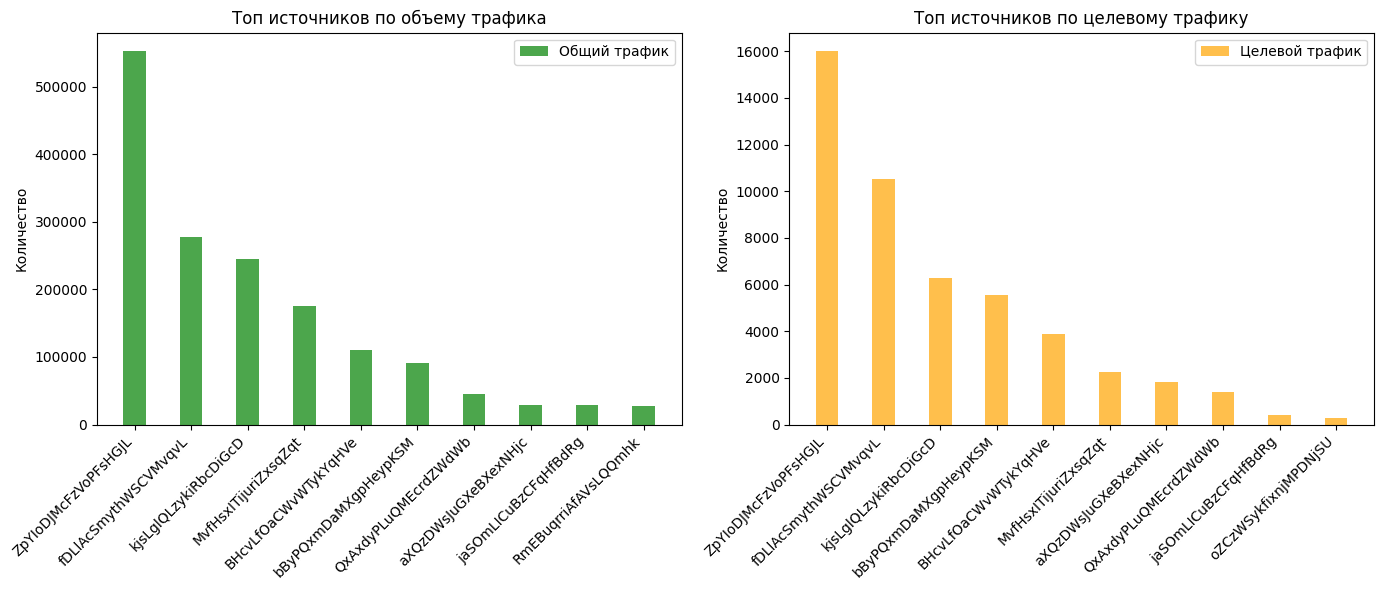

In [96]:
# Визуализация источников топового трафика
traffic_visualization(top_traffic, top_target_traffic, 'Топ источников по объему трафика', 'Топ источников по целевому трафику')


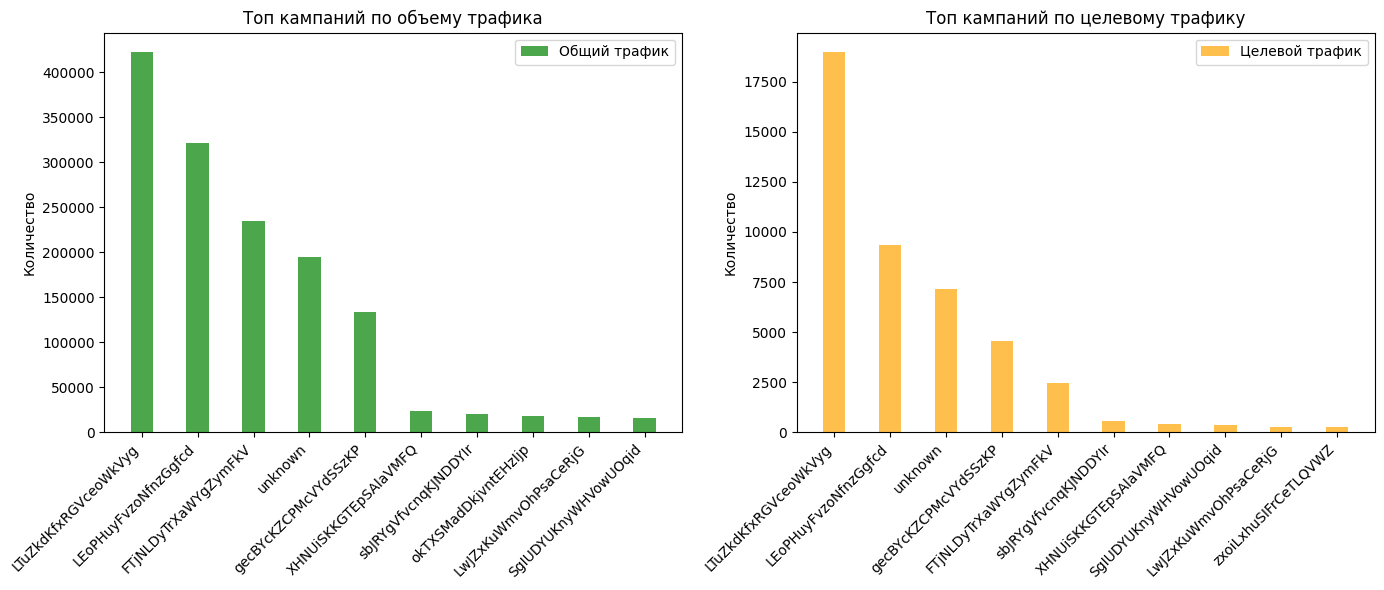

In [97]:
# Визуализация топового трафика utm_campagn
traffic_visualization(top_traffic_campaign, top_target_traffic_campaign, 'Топ кампаний по объему трафика', 'Топ кампаний по целевому трафику')


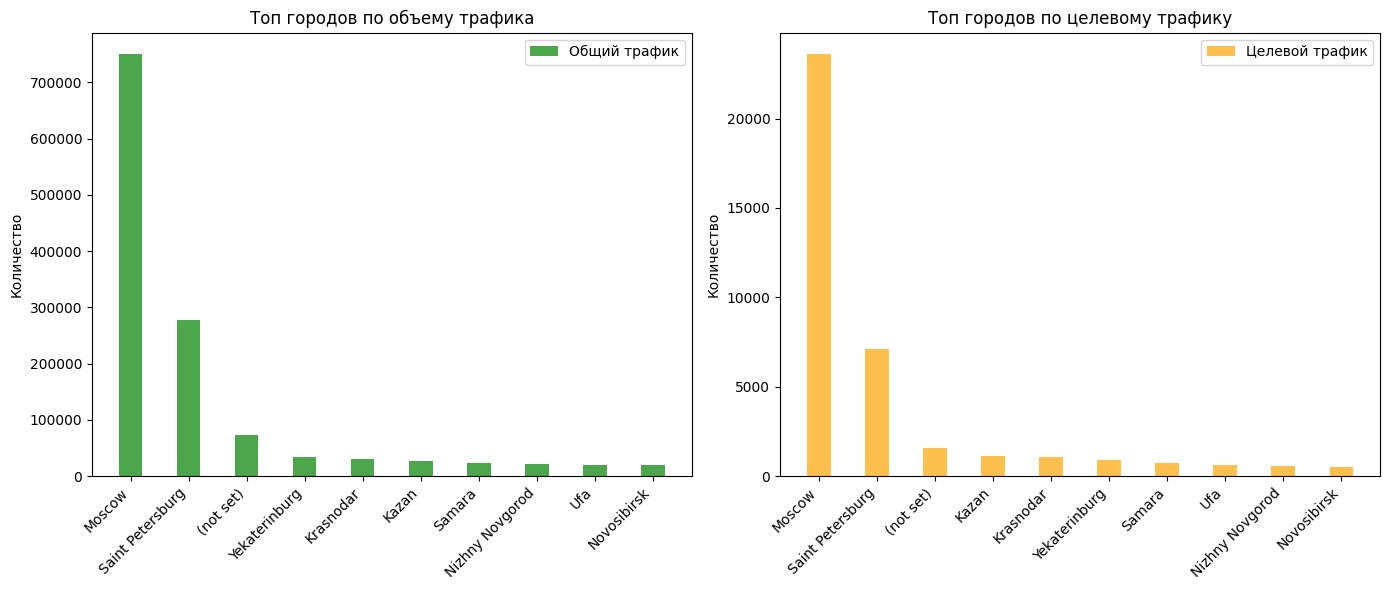

In [98]:
traffic_visualization(top_traffic_city, top_target_traffic_city, 'Топ городов по объему трафика', 'Топ городов по целевому трафику')


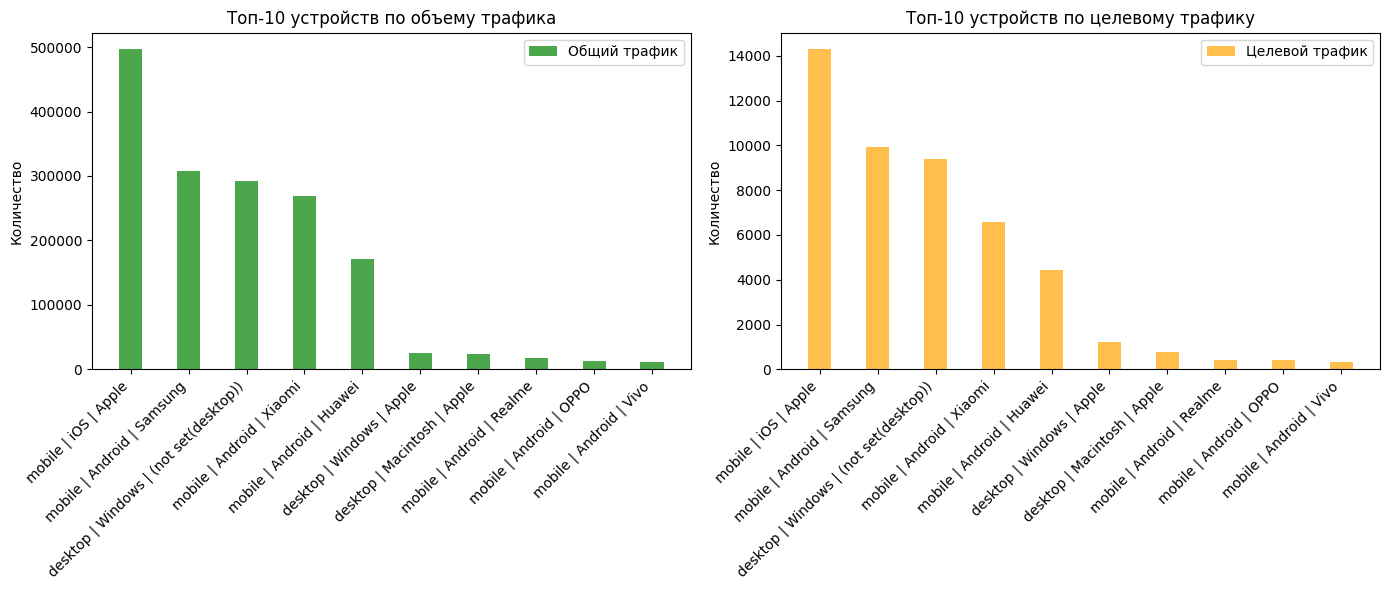

In [99]:
# визуализируем трафик по устройствам

# Создаём новую колонку "device_info", объединяя тип устройства, ОС и бренд
df['device_info'] = df['device_category'] + ' | ' + df['device_os'] + ' | ' + df['device_brand']

# Группировка по устройствам
total_traffic = df['device_info'].value_counts()  # Все сессии
top_traffic = total_traffic.head(10)
target_traffic = df[df['event_value'] == 1]['device_info'].value_counts()  # Только целевые сессии
top_target = target_traffic.head(10)

traffic_visualization(top_traffic, top_target, 'Топ-10 устройств по объему трафика', 'Топ-10 устройств по целевому трафику')


Отвечаем на последний вопрос бизнеса про рекламу в соцсетях:


In [100]:
# влияет ли реклама в соцсетях положительно на объем трафика и на целевой трафик
df['source social media'].value_counts()

# мы видим явное преобладание трафика из рекламы в соцсетях по сравнению с остальными источниками
# посмотрим, влияет ли она на таргет


,count
source social media,
1,1475717
0,256280


In [101]:
print('Общее количество сессий с целевым действием: ', df['event_value'].value_counts()[1])
print('Число сессий с целевым действием, источник которой были соцсети: ', df.loc[(df['source social media'] == 1) & (df['event_value'] == 1)].shape[0])


Общее количество сессий с целевым действием:  50310
Число сессий с целевым действием, источник которой были соцсети:  46289


Тут и без графика можно сделать следующие выводы:
- влияние соцсетей очень велико на СR, увеличивать рекламу там конечно же стоит
- но, чтобы избежать только одного канала привлечения, стоит обратить внимание на другие ресурсы и увеличить рекламу там
- не совсем ясно такая политика у компании(выделять больше средств на рекламу в соцсетях) либо реклама именно там действительно работает лучше всего, если средства на нее были равноценно распределены между всеми источниками


##Ислледование гипотез

###>Органический трафик не отличается от платного
с точки зрения CR в целевые события.

In [102]:
#проверяем данные на нормальность распределения
# Группировка данных
organic_cr = df[df['type of traffic'] == 1]['event_value']
paid_cr = df[df['type of traffic'] == 0]['event_value']

# Тест Шапиро-Уилка
stat_org, p_org = stats.shapiro(organic_cr)
stat_paid, p_paid = stats.shapiro(paid_cr)

print(f'Organic Traffic: W={stat_org}, p-value={p_org}')
print(f'Paid Traffic: W={stat_paid}, p-value={p_paid}')


Organic Traffic: W=0.20717388291737393, p-value=2.1585286358026578e-215
Paid Traffic: W=0.13356903594142877, p-value=3.2822534526281515e-236


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 468919.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1263078.
  res = hypotest_fun_out(*samples, **kwds)


p-value больше 5%, значит данные распределены нормально.

Выборки независимы, значит проверяем дисперсии:


In [103]:
stats.levene(organic_cr, paid_cr)


LeveneResult(statistic=5378.406381647336, pvalue=0.0)

Дисперсии однозначно не равны, значит проверяем гипотезу с помощью Т-критерия Уэлча


In [104]:
stats.ttest_ind(organic_cr, paid_cr, equal_var=False)


TtestResult(statistic=63.83919588995678, pvalue=0.0, df=665006.051678058)

Разница в средних значениях считается значимой, значит органический трафик отличается от платного с точки зрения CR


In [105]:
# Проверим это простыми подсчетами

organic_cr.value_counts()


,count
event_value,
0,448107
1,20812


In [106]:
paid_cr.value_counts()


,count
event_value,
0,1233580
1,29498


Так и есть. У платного трафика CR выше.


###>Трафик с мобильных устройств не отличается от трафика с десктопных устройств
 с точки зрения CR
в целевые события.

In [107]:
#проверяем данные на нормальность распределения
# Группировка данных
mobile_cr = df[df['type_device'] == 1]['event_value']
desktop_cr = df[df['type_device'] == 0]['event_value']

# Тест Шапиро-Уилка
stat_org, p_org = stats.shapiro(mobile_cr)
stat_paid, p_paid = stats.shapiro(desktop_cr)

print(f'Mobile Traffic: W={stat_org}, p-value={p_org}')
print(f'Desktop Traffic: W={stat_paid}, p-value={p_paid}')


Mobile Traffic: W=0.1517174102962081, p-value=1.4995208320873075e-236
Desktop Traffic: W=0.17050594873970948, p-value=1.855586334754553e-210


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1385106.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 346891.
  res = hypotest_fun_out(*samples, **kwds)


Данные распределены нормально, независимы,  проверяем дисперсии:


In [108]:
stats.levene(mobile_cr, desktop_cr)


LeveneResult(statistic=263.8614788593355, pvalue=2.495895260441997e-59)

Дисперсии равны, значит используем
т-критерий стьюдента


In [109]:
stats.ttest_ind(mobile_cr, desktop_cr, alternative='greater')


TtestResult(statistic=-16.243813556530853, pvalue=1.0, df=1731995.0)

Среднее значение первой выборки (целевой трафик с мобильных устройств) больше среднего значения трафика с компьютеров


In [110]:
mobile_cr.value_counts()[1]


38797

In [111]:
desktop_cr.value_counts()[1]

11513

Так и есть!

###>Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов
с точки зрения CR в целевые события.

In [112]:
#проверяем данные на нормальность распределения
# Группировка данных
presence_city_traffic = df[df['traffic_from'] == 1]['event_value']
other_city_traffic = df[df['traffic_from'] == 0]['event_value']

# Тест Шапиро-Уилка
stat_org, p_org = stats.shapiro(presence_city_traffic)
stat_paid, p_paid = stats.shapiro(other_city_traffic)

print(f' Traffic: W={stat_org}, p-value={p_org}')
print(f' Traffic: W={stat_paid}, p-value={p_paid}')


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1112313.
  res = hypotest_fun_out(*samples, **kwds)


 Traffic: W=0.15889738514806773, p-value=3.0809623703980515e-233
 Traffic: W=0.14954436049050435, p-value=9.192382974617881e-224


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 619684.
  res = hypotest_fun_out(*samples, **kwds)


Данные распределены нормально, выборки независмы, проверяем равенство дисперсий:


In [113]:
stats.levene(presence_city_traffic, other_city_traffic)


LeveneResult(statistic=88.9561787571713, pvalue=4.041274845033119e-21)

Дисперсии равны, используем т-критерий стьюдента


In [114]:
stats.ttest_ind(presence_city_traffic, other_city_traffic, alternative='greater')


TtestResult(statistic=9.431658324874332, pvalue=2.0206374212781368e-21, df=1731995.0)

Трафик из городов присутствия выше чем из других городов
